In [55]:
import os
import pickle as pkl
from collections import Counter
import yaml
import numpy as np
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)
dat_dir = CFG["gpudatadir"]

In [9]:
# built on sister
with open(os.path.join(dat_dir, 'ppl_dist_in_bags.pkl'), 'rb') as f:
    dist_dict = pkl.load(f)
with open(os.path.join(dat_dir, 'lookup_cie.pkl'), 'rb') as f_name:
    cie_dict = pkl.load(f_name)
with open(os.path.join(dat_dir, 'lookup_clus.pkl'), 'rb') as f_name:
    clus_dict = pkl.load(f_name)
with open(os.path.join(dat_dir, 'lookup_dpt.pkl'), 'rb') as f_name:
    dpt_dict = pkl.load(f_name)

In [10]:
lookup_bag = {"cie": cie_dict,
             "clus": clus_dict,
             "dpt": dpt_dict}

In [4]:
total_cie = sum([i for i in dist_dict["cie"].values()])
total_clus = sum([i for i in dist_dict["clus"].values()])
total_dpt = sum([i for i in dist_dict['dpt'].values()])

In [12]:
def plot_hist_and_info(dist_dict, lookup_bag, handle):
    counts_bag = [i for i in dist_dict[handle].values()]
    # bags = [i for i in dist_dict[handle].keys()]
    plt.hist(counts_bag, density=True)
    print(stats.describe(counts_bag))
    most_rep = [(lookup_bag[handle][i], j) for (i, j) in dist_dict[handle].most_common(3)]
    print("Most represented classes: " + str(most_rep))

DescribeResult(nobs=207, minmax=(1, 5196), mean=867.3381642512078, variance=523361.4676140895, skewness=3.06773249837509, kurtosis=12.391066942059943)
Most represented classes: [('sncf', 5196), ('orange', 4962), ('edf', 3851)]


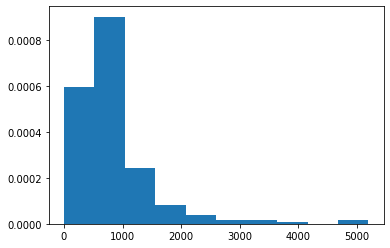

In [15]:
plot_hist_and_info(dist_dict, lookup_bag, "cie")

DescribeResult(nobs=30, minmax=(782, 13643), mean=5984.633333333333, variance=10769628.722988507, skewness=0.6686944102823141, kurtosis=-0.3070017972128265)
Most represented classes: [(4, 13643), (23, 12426), (29, 11858)]


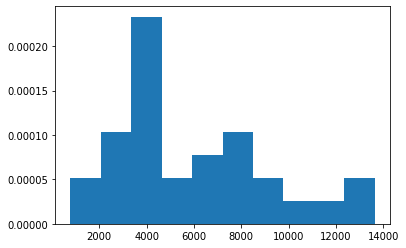

In [16]:
plot_hist_and_info(dist_dict, lookup_bag, "clus")

DescribeResult(nobs=5888, minmax=(1, 971), mean=30.492357336956523, variance=2779.3021328486775, skewness=5.216882016914969, kurtosis=42.813317983096354)
Most represented classes: [(('educationnationale', 14), 971), (('orange', 29), 598), (('sncf', 29), 572)]


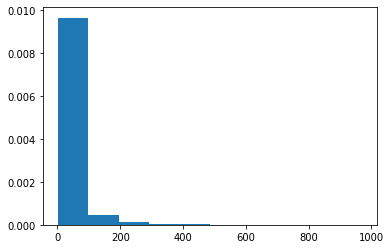

In [17]:
plot_hist_and_info(dist_dict, lookup_bag, "dpt")

In [27]:
for handle in ["cie", 'clus', "dpt"]:
    print(dist_dict[handle].most_common(10))

[(177, 5196), (149, 4962), (73, 3851), (179, 3546), (40, 3273), (74, 2889), (25, 2669), (175, 2580), (39, 2544), (164, 2483)]
[(211, 13643), (230, 12426), (236, 11858), (215, 10245), (209, 9627), (229, 9200), (208, 8453), (217, 7760), (224, 7618), (222, 7312)]
[(2356, 971), (4530, 598), (5286, 572), (5280, 567), (1397, 507), (4505, 497), (5206, 485), (1371, 484), (5258, 469), (4923, 466)]


In [28]:
tgt_file = os.path.join(CFG["datadir"], "most_common_classes_")
for handle in ["cie", 'clus', "dpt"]:
    mc_class = dist_dict[handle].most_common(10)
    with open(tgt_file + handle + ".pkl", "wb") as f:
        pkl.dump(mc_class, f)

In [10]:
datasets = {}
agg_type = "avg"
rep_type = "ft"

for split in ["TRAIN", "VALID", "TEST"]:
    file_name = "disc_poly_" + agg_type + "_" + rep_type + "_" + split + ".pkl"
    with open(os.path.join(CFG["datadir"], file_name), 'rb') as f_name:
        datasets[split] = torch.load(f_name)

In [17]:
def select_relevant_tuples(bag_type, all_tuples, bag_rep):
    tuples = []
    for person in all_tuples:
        tuples.append({"id": person["id"],
                        "ppl_rep": person["rep"],
                        "bag_rep":bag_rep,
                        "label": person[bag_type]
                        })
    return tuples

In [18]:
rel_tuples = {}
for split in ["TRAIN", "VALID", "TEST"]:
    rel_tuples[split] = select_relevant_tuples("clus", datasets[split]["tuples"],  datasets[split]["bag_rep"][207: 237])

In [23]:
labels_per_split = {}
for split in ["TRAIN", "VALID", "TEST"]:
    labels_per_split[split] = {}
    for lab in range(207, 237):
        labels_per_split[split][lab] = 0
    for person in rel_tuples[split]:
        labels_per_split[split][person["label"]] += 1

In [24]:
labels_per_split

{'TRAIN': {207: 1810,
  208: 6812,
  209: 8859,
  210: 3367,
  211: 13173,
  212: 4449,
  213: 2208,
  214: 2321,
  215: 9711,
  216: 185,
  217: 6710,
  218: 1646,
  219: 3042,
  220: 2181,
  221: 2412,
  222: 6983,
  223: 6261,
  224: 6931,
  225: 1893,
  226: 1760,
  227: 5594,
  228: 6082,
  229: 6930,
  230: 11940,
  231: 2241,
  232: 1779,
  233: 3880,
  234: 217,
  235: 2782,
  236: 9782},
 'VALID': {207: 242,
  208: 855,
  209: 521,
  210: 958,
  211: 78,
  212: 185,
  213: 1159,
  214: 1370,
  215: 460,
  216: 314,
  217: 730,
  218: 266,
  219: 242,
  220: 795,
  221: 577,
  222: 18,
  223: 254,
  224: 354,
  225: 22,
  226: 670,
  227: 391,
  228: 175,
  229: 1529,
  230: 464,
  231: 709,
  232: 1037,
  233: 1157,
  234: 668,
  235: 807,
  236: 759},
 'TEST': {207: 368,
  208: 786,
  209: 247,
  210: 235,
  211: 392,
  212: 798,
  213: 1184,
  214: 872,
  215: 74,
  216: 283,
  217: 320,
  218: 1122,
  219: 629,
  220: 857,
  221: 469,
  222: 311,
  223: 353,
  224: 333,
  2

In [48]:
dist_train = [i[1] / 80 for i in sorted(labels_per_split["TRAIN"].items())]
dist_valid = [i[1] / 10 for i in sorted(labels_per_split["VALID"].items())]
dist_test = [i[1] / 10 for i in sorted(labels_per_split["TEST"].items())]

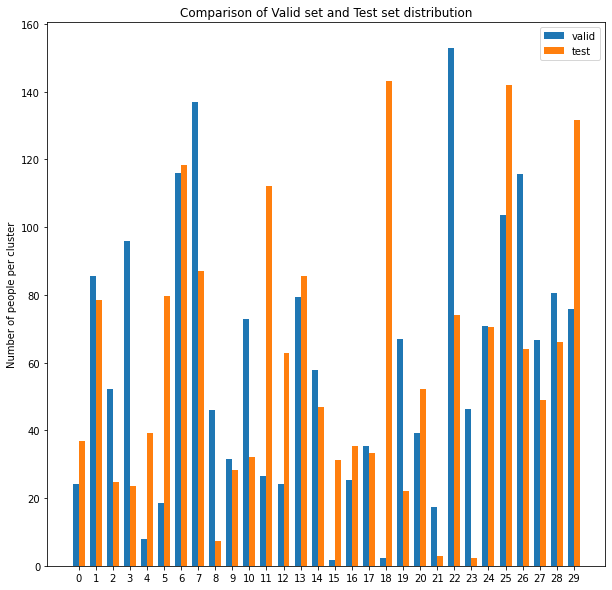

In [71]:
width = .35

fig, ax = plt.subplots(figsize=(10, 10))
x = np.array(range(0, 30))
rects1 = ax.bar(x - width/2 , dist_valid, width, label="valid")
rects2 = ax.bar(x + width/ 2, dist_test, width, label="test")

ax.set_ylabel('Number of people per cluster')
ax.set_title('Comparison of Valid set and Test set distribution')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.show()